# <strong>Stochastics (Chapter 10) 
확률과정 (<strong>'금융기관 과 상대방의 Book(포트폴리오)'</strong>에 대한 <strong>일반화와 비교를 통한 '몬테카를로 시뮬레이션'</strong>이 중요하다)

1. 난수, 시뮬레이션, 가치평가(유러피안/미국식), 위험측도 
1. <strong>VaR (Value-at-Risk) 확률적 신뢰도</strong>를 기반한, 특정시간 발생가능한 <strong>손실가능금액</strong>
1. <strong>CVA (Credit Value Adjustment) 파산위험</strong>을 반영한 <strong>위험측도</strong>
1. <strong>CVaR (Conditional Value At Risk) 위험값과 위험을 초과하는 손실</strong> 사이를 <strong>가중평균</strong>한 값

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='NanumGothic')

<br>
## <strong>1 난수 생성
Random Numbers
### <strong>01 ndarray로 난수생성
np.random.rand(1dim, 2dim....)

In [2]:
# Default : 평균 0, 분산 1 범위 난수를 생성
print('3 개의 난수 :', np.random.rand(3))
print('\n3x3 의 난수 :',np.random.rand(3,3))
print('\n3x3x3 난수 :',np.random.rand(3,3,3))

# 구간난수 생성 (min(3) ~ max(9) 사이의 난수를 생성)
# np.random.rand(3) * (max - min) + min
a, b = 3., 9.
print(np.random.randint(10 , size=10))
print('\n구간난수 (3~9) :', np.random.rand(3)    * (b - a) + a)
print('\n구간난수 (3~9) :', np.random.rand(3, 3) * (b - a) + a)  # 브로드캐스팅을 활용한 난수생성

3 개의 난수 : [ 0.50464651  0.52705048  0.71674216]

3x3 의 난수 : [[ 0.47477123  0.71108499  0.37006129]
 [ 0.09629844  0.98916665  0.49679443]
 [ 0.35171679  0.30169605  0.53317879]]

3x3x3 난수 : [[[ 0.19181765  0.93780818  0.62200279]
  [ 0.64558315  0.39114508  0.67335266]
  [ 0.99293371  0.29538535  0.07061123]]

 [[ 0.48540615  0.49230881  0.59873209]
  [ 0.10814773  0.61574962  0.82904955]
  [ 0.36324099  0.26927329  0.78668586]]

 [[ 0.41653609  0.44143447  0.87344812]
  [ 0.59195215  0.02410261  0.82116156]
  [ 0.93130903  0.71894683  0.1457019 ]]]
[3 7 1 1 2 6 9 7 8 8]

구간난수 (3~9) : [ 5.82834498  7.30226652  5.13842958]

구간난수 (3~9) : [[ 3.4811277   5.02113623  4.27236112]
 [ 4.5834753   5.01921197  6.88160783]
 [ 6.8448462   7.45766318  6.67908533]]


### <strong>02 ndarray 여러타입 난수 비교
np.random

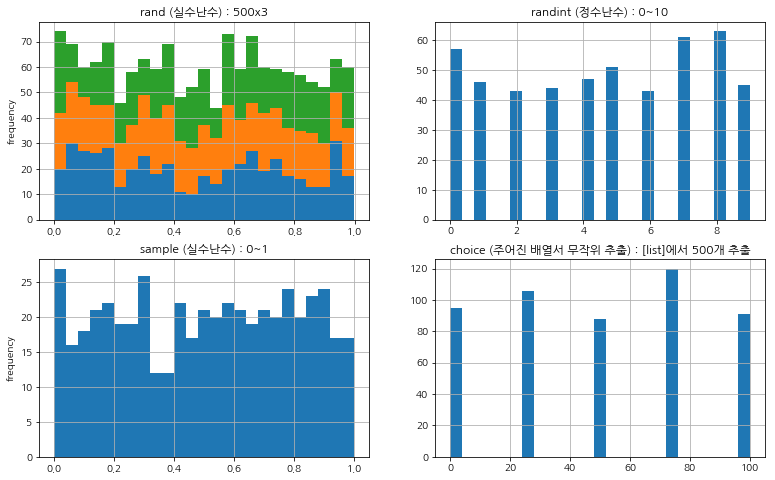

In [3]:
# 다양한 조건의 난수들을 생성
sample_size = 500
a = [0, 25,50, 75, 100]
rn1 = np.random.rand(sample_size, 3)           # 실수난수 : 0~1 사이의 난수를 생성 (500 x 3 Matrix 출력)
rn2 = np.random.randint(0, 10, sample_size)    # 정수난수 : 0~10 사이의 정수를 난수로 추출
rn3 = np.random.sample(size = sample_size)     # 실수난수 : 0~1 사이의 float 난수를 추출 
rn4 = np.random.choice(a, size = sample_size)  # 주어진 [List] 배열에서 500개 무작위 추출

# 난수의 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 8))
ax1.hist(rn1, bins = 25, stacked = True)
ax1.set_title('rand (실수난수) : 500x3');   ax1.grid(True); ax1.set_ylabel('frequency')
ax2.hist(rn2, bins = 25);                          
ax2.set_title('randint (정수난수) : 0~10'); ax2.grid(True)
ax3.hist(rn3, bins = 25); 
ax3.set_title('sample (실수난수) : 0~1'); ax3.grid(True); ax3.set_ylabel('frequency')                  
ax4.hist(rn4, bins = 25)
ax4.set_title('choice (주어진 배열서 무작위 추출) : [list]에서 500개 추출'); ax4.grid(True)
# 결론 : 정규분포, 로그정규분포에 많이 의존하는 모델로 시뮬레이션을 진행한다.

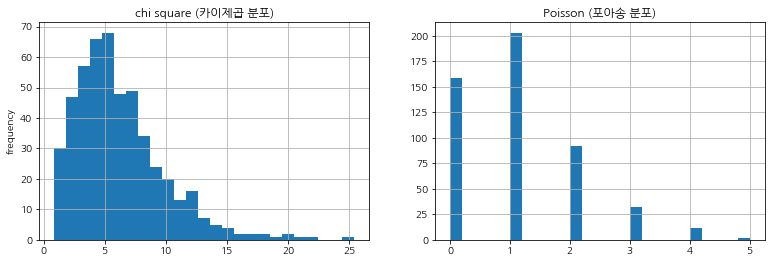

In [4]:
sample_size = 500
# 카이제곱 분포 : 정규분포를 갖는 '개별 x 제곱'의 분포 (k 자유도 : 카이제곱의 평균은 k, 카이제곱의 분산은 2k 와 같다) 
# cf) 자유도가 무한대일 때 정규분포를 갖는다 (1000 이상이면 충분히 큰 값)
rn1 = np.random.chisquare(df=6, size=sample_size)
# 포아송 분포 (정해진 기간 내 특정사건이 발생한 횟수에 대한 분포) ex) 1페이지 오타발견 수
rn2 = np.random.poisson(lam=1.0, size=sample_size)  # 람다계수 : 1 (1페이지 1개 오타가 발견분포 난수를 500개 생성)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
ax1.hist(rn1, bins=25)
ax1.set_title('chi square (카이제곱 분포)'); ax1.set_ylabel('frequency'); ax1.grid(True) 
ax2.hist(rn2, bins=25)
ax2.set_title('Poisson (포아송 분포)'); ax2.grid(True)

<br>
## <strong>2 시뮬레이션
<strong>몬테카를로 시뮬레이션</strong> (유연한 수치해석이 가능한 대신, 계산 부담이 크다) 확률변수 모형
1. 정규분포를 활용
1. 로그 정규분포를 활용

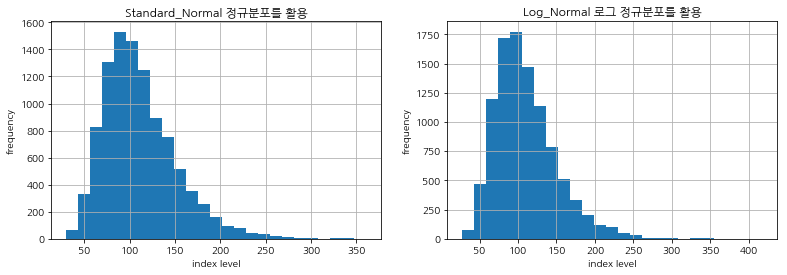

In [5]:
# 파라미터 정의
S0, r, sigma = 100, 0.05, 0.25  # 초기값 지정,  고정 단기 이자율, 고정 변동성
T,  I        = 2.0, 10000       # 시뮬레이션 기간(연),  생성할 난수의 갯수

# 1.정규분포(Standard_Normal)를 활용한 '블랙숄츠모형'
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
         + sigma * np.sqrt(T) * np.random.standard_normal(I))

# 2.로그 정규분포(Log_Normal)를 활용한 '블랙숄츠모형'
ST2 = S0 * np.random.lognormal((r - 0.5 * sigma ** 2) * T,
           sigma * np.sqrt(T), size = I)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
ax1.hist(ST1, bins=25)
ax1.set_title('Standard_Normal 정규분포를 활용'); ax1.set_xlabel('index level'); ax1.set_ylabel('frequency'); ax1.grid(True)
ax2.hist(ST2, bins=25)
ax2.set_title('Log_Normal 로그 정규분포를 활용'); ax2.set_xlabel('index level'); ax2.set_ylabel('frequency'); ax2.grid(True)

In [6]:
# 3.2가지 통계적 분석 데이터 비교용 출력함수
import scipy.stats as scs
def print_statistics(a1, a2):                         # a1, a2 : ndarray objects
    sta1, sta2 = scs.describe(a1), scs.describe(a2)   # scs.describe(ST1) : 통계적 요약 내용을 출력
    print("%16s %14s %14s"  % ('statistic', 'data set 1', 'data set 2'),'\n', 48 * "-")
    print("%16s %14.3f %14.3f" % ('크기(size)',sta1[0],     sta2[0]))
    print("%16s %14.3f %14.3f" % ('최소(min)',    sta1[1][0],  sta2[1][0]))
    print("%16s %14.3f %14.3f" % ('최대(max)',    sta1[1][1],  sta2[1][1]))
    print("%16s %14.3f %14.3f" % ('평균(mean)',   sta1[2],     sta2[2]))
    print("%16s %13.3f %14.3f" % ('표준편차(std)',  np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%16s %14.3f %14.3f" % ('왜도(skewness)', sta1[4],    sta2[4]))
    print("%16s %14.3f %14.3f" % ('첨도(kurtosis)', sta1[5],    sta2[5]))

print_statistics(ST1, ST2)
# 샘플링 과정으로 인한 '이산오차(discretization)'을 제외하면 통계치 결과는 상당히 유사하다

       statistic     data set 1     data set 2 
 ------------------------------------------------
        크기(size)      10000.000      10000.000
         최소(min)         30.096         27.336
         최대(max)        360.783        417.102
        평균(mean)        111.531        110.010
       표준편차(std)        40.463         40.359
    왜도(skewness)          1.105          1.125
    첨도(kurtosis)          1.997          2.260


<br>
## <strong>3 확률과정 모형
확률과정은 확률변수를 반복해서 시뮬레이션 하는 결과로써, 금융공학의 특성상 <strong>Markov 특성 (무기억성 확률과정(memoryless))</strong>을 갖는다

### <strong>01 기하 브라운 운동모형 (Geometric Brownian Motion)
'블랙 숄즈 머튼'모형의 <strong>확률미분 방정식</strong>
$$\mathrm dS_t = rS_t \mathrm dt + \sigma S_t \mathrm dZ_t$$
개별 인자간 특성이 다르므로, <strong>오일러 방법</strong>으로 <strong>정확히 이산화(discretization)</strong>가 가능하다

cf) <strong>이산화</strong> : 일정범위를 구간으로 나눔 (연속형 자료의 범주화), <strong>근사화</strong> : 정규분포 형태로 변환 (정규화와 비슷한 듯)
1. $Z_t :$ <strong>표준 브라운 운동과정
1. $S_t :$ Log 정규분포
1. $\frac{\mathrm dS_t}{S_t} : $ 정규분포</strong>

'블랙 숄즈 머튼'모형을 따르는 <strong>동적 주가 시뮬레이션</strong>
$$ S_t = S_{t-\Delta t} exp((r- \frac{1}{2}\sigma^2)\Delta t + \sigma \sqrt{ \Delta t Z_t})  $$
1. $\Delta t :$ <strong>고정된 시간 이산화 간격</strong> (컴퓨터 시뮬레이션을 위해 시간을 매우 작은 간격으로 나눈 값)
1. $Z_t : $ <strong>정규분포를 따르는 확률변수

       statistic     data set 1     data set 2 
 ------------------------------------------------
        크기(size)      10000.000      10000.000
         최소(min)         23.462         27.336
         최대(max)        386.490        417.102
        평균(mean)        110.209        110.010
       표준편차(std)        39.646         40.359
    왜도(skewness)          1.051          1.125
    첨도(kurtosis)          1.819          2.260


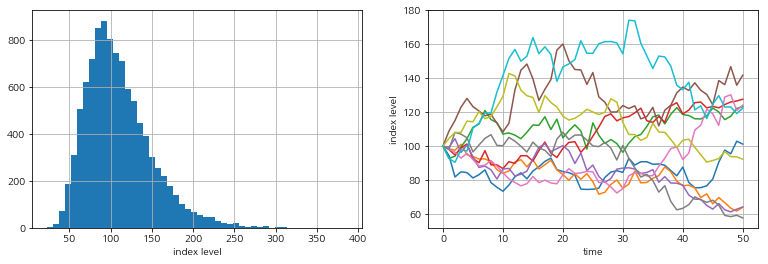

In [7]:
# parameter 정의
I, M, T = 10000, 50, 2.0     # items 생성 갯수, 총 시뮬레이션 횟수, time 시뮬레이션 기간(연)
dt      = T/M                # 이산화 시간간격 (총 시뮬레이션 횟수 /시뮬레이션 기간(연))
S       = np.zeros((M+1, I)) # Zero Matrix
S[0]    = S0                 # 초기값 입력 (S0 = 100 : 위의 100을 입력)

for t in range(1, M+1):      # 50개의 구간에서, 10,000번의 시뮬레이션을 한다
    S[t] = S[t-1] * np.exp((r - 0.5*sigma**2) * dt   # sigma : 변동성 beta 값 (float)
            + sigma * np.sqrt(dt) * np.random.standard_normal(I))

# 브라운 모델을 활용한 주가 시뮬레이션 (Simulated geometric Brownian motion at maturity)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
ax1.hist(S[-1], bins=50)      # 마지막 시뮬레이션 히스토그램을 출력
ax1.set_xlabel('index level'); plt.ylabel('frequency'); ax1.grid(True)
ax2.plot(S[:,-10:], lw=1.5)   # 10,000개의 모형 중 10개의 시뮬레이션 과정을 출력 
ax2.set_xlabel('time');  ax2.set_ylabel('index level'); ax2.grid(True)

print_statistics(S[-1], ST2)  
# 해석 : 시뮬레이션 결과와 Log로그분포(ST2)기 유사한 패턴임을 알 수 있다

### <strong>02 제곱근 확산 확률 미분 방정식 (square-root diffusion)
<strong>오일러 방식의 이산화 :</strong>제곱근 확산 확률 과정
$$\mathrm dx_t = k(\theta - x_t)\mathrm dt + \sigma \sqrt{x_t}\mathrm dZ_t$$   
1. $X_t : $ 시간 t에서 확률과정 값
1. $K : $ 평균 회귀 계수
1. $\theta :$ 확률 과정의 장기 평균
1. $\sigma :$ 고정 변동성
1. $Z :$ 표준 브라운 운동

평균회귀과정 모형(변동성이 평균으로 회귀)</strong>중 하나인 <strong>콕스-잉거솔-로스 모형 (Cox-Ingersoll & Ross)</strong>으로 

'오일러 방식' 이산화는 브라운운동모형 에만 정확히 적용</strong> 가능하고, <strong>다른 모델에서는 편향오차</strong>를 갖지만

<strong>계산상의 장점</strong>으로 인해서 $S= t - \delta t$와 $X^+ = max(x,0)$을 활용, <strong>오일러방식</strong>을 적용 한다
$$ \widetilde X_t = \widetilde X_s + \kappa(\theta - \widetilde X_s^+)\Delta t + \sigma \sqrt{\widetilde x_s^+} 
\sqrt{\delta t Z_t}$$ 

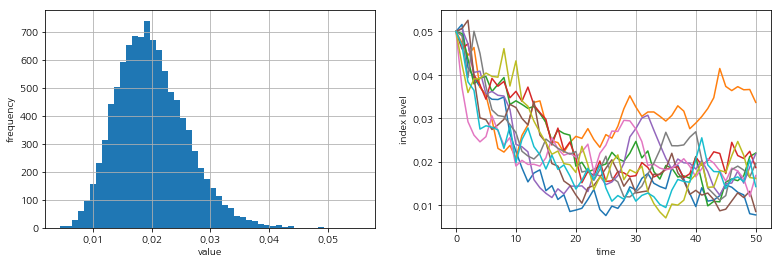

In [8]:
x0, kappa, theta, sigma = 0.05, 3.0, 0.02, 0.1 # 초기값, 평균회귀계수, 확률과정의 장기평균, 고정 변동성
I,  M,     dt           = 10000, 50, T/M       # 시뮬레이션 횟수, 

# '오일러방식'을 사용한 제곱근 확산모형 (x는 양수만 가능하다)
# 때문에 확률 과정을 저장하기 위한 두개의 ndarray 객체를 필요로 한다
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0], x1[0] = x0, x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
                           + sigma * np.sqrt(np.maximum(xh[t - 1], 0))  * np.sqrt(dt)  
                           * np.random.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1

x1 = srd_euler()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
ax1.hist(x1[-1], bins=50)       # 히스토그램 시각화 
ax1.set_xlabel('value'); ax1.set_ylabel('frequency'); ax1.grid(True)
ax2.plot(x1[:, ::1000], lw=1.5) # 10,000번 중, 10개의 시뮬레이션 결과를 시각화
ax2.set_xlabel('time'); ax2.set_ylabel('index level'); ax2.grid(True)
# 해석 : 값이 장기평균(3년국채 이자율) 0.02보다 높아서, 표류경향(drift)은 음수로 장기평균에 수렴함을 알 수 있다

In [9]:
x1.shape

(51, 10000)

### <strong>03 제곱근 확산모형의 <strong>'카이제곱분포'</strong> 이산화
<strong>정확한 이산화 방식 : </strong> 자유도와 비중심인수를 갖는 '카이제곱분포'로 재정의

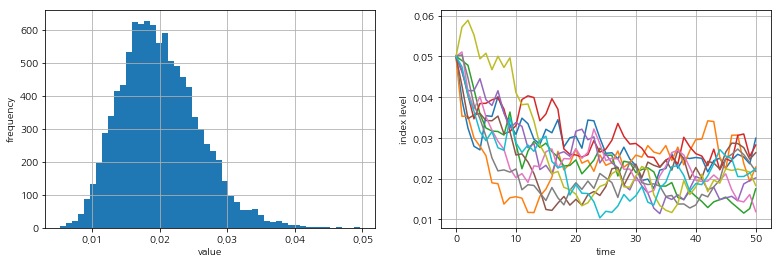

In [10]:
# 카이제곱분포를 활용한 제곱근 확산모형
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df    = 4 * theta * kappa / sigma ** 2
        c     = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc    = np.exp(-kappa * dt) / c * x2[t - 1] 
        x2[t] = c * np.random.noncentral_chisquare(df, nc, size=I)
    return x2

x2 = srd_exact()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
ax1.hist(x2[-1], bins=50)    # Simulated square-root diffusion at maturity (exact scheme)
ax1.set_xlabel('value'); ax1.set_ylabel('frequency'); ax1.grid(True)
ax2.plot(x2[:, :10], lw=1.5)
ax2.set_xlabel('time'); ax2.set_ylabel('index level'); ax2.grid(True)
# 제곱근 확산모형 시뮬레이션 해석 : 음표류경향을 보여주므로, sigma로 수렴함을 알 수 있다

In [11]:
# 성능의 비교
%time x1 = srd_euler() 
%time x2 = srd_exact() 
print_statistics(x1[-1], x2[-1])
# 제곱근 확산모형의 결과는 비슷하지만,
# 처리속도는 '오일러 방식'에 비해 '카이제곱 샘플링'이 느리다

CPU times: user 50.6 ms, sys: 66.9 ms, total: 118 ms
Wall time: 39.7 ms
CPU times: user 70.6 ms, sys: 22.8 ms, total: 93.4 ms
Wall time: 71.4 ms
       statistic     data set 1     data set 2 
 ------------------------------------------------
        크기(size)      10000.000      10000.000
         최소(min)          0.004          0.004
         최대(max)          0.048          0.055
        평균(mean)          0.020          0.020
       표준편차(std)         0.006          0.006
    왜도(skewness)          0.549          0.541
    첨도(kurtosis)          0.387          0.519


### <strong>04 확률적 변동성 모형
블랙-숄즈-머튼의 변동성을 고정시킨 한계가 있어서, 90년대부터 <strong>'확률적 변동성(Stochastic Volatility)'</strong>을 적용한 <strong>'헤스톤 모형(1993)'등이</strong> 있다
$$ \mathrm dS_t = rS_t \mathrm dt + \sqrt{v_t}S_t \mathrm dZ_t^1 $$
$$ \mathrm dv_t = k_v(\theta_v - v_t) \mathrm dt + \sigma_v \sqrt{v_t} \mathrm dZ_t^2 $$
$$ \mathrm dZ_t^1 \mathrm dZ_t^2 = \rho $$

인수 $\rho$는 두 표준 브라운 운동 $ Z_t^1, Z_t^2 $의 순간 상관관계로, <strong>시장이 하락시 변동성이 증가</strong>하고 <strong>시장이 상승시 변동성이 감소</strong>하는 <strong>레버리지 효과(leverage effect)</strong>를 설명 가능하다

In [12]:
# BSM 모델의 한계는, Beta 값이 일정함을 가정
S0,    r,     v0    = 100., 0.05, 0.1
kappa, theta, sigma =  3.0, 0.25, 0.1
rho,   T            =  0.6,  1.0

# 두 확률의 상관계수 계산을 위해, 숄레스키 분해(Cholesky Decomposition)를 활용
# cf) 숄레스키 분해 : Matrix를 인수분해하는 것으로 'Matrix'에 root(제곱근)를 씌운 결과라고 생각하시면 쉽습니다.
corr_mat       = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat        = np.linalg.cholesky(corr_mat); cho_mat  # 숄레스키 분해

array([[ 1. ,  0. ],
       [ 0.6,  0.8]])

In [13]:
# v[ ] : '제곱근 확산모형'에 기반한 변동성 측정 ('오일러 이산화 방식'을 적용 (속도가 빠르다))
M, I, dt    = 50, 10000, T/M  # 시뮬레이션에 사용할 parameter를 설정
ran_num     = np.random.standard_normal((2, M + 1, I))
v           = np.zeros_like(ran_num[0])
vh          = np.zeros_like(v)
v[0], vh[0] = v0, v0
for t in range(1, M + 1):
    ran   = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
            + sigma * np.sqrt(np.maximum(vh[t-1], 0)) * np.sqrt(dt) * ran[1])
v = np.maximum(vh, 0)

# S[ ] : 상관관계를 고려한 기하 브라운 운동을 '오일러 방식'으로 이산화 한다
S    = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran  = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                      np.sqrt(v[t]) * ran[0] * np.sqrt(dt))
print_statistics(S[-1], v[-1])  # Data set1 : 브라운 운동 / Data set2 : 제곱근 확산 모형 

       statistic     data set 1     data set 2 
 ------------------------------------------------
        크기(size)      10000.000      10000.000
         최소(min)         18.885          0.166
         최대(max)        498.671          0.325
        평균(mean)        108.299          0.243
       표준편차(std)        52.485          0.020
    왜도(skewness)          1.613          0.185
    첨도(kurtosis)          4.560          0.064


Text(0.5,1,'제곱근 확산모델 시뮬레이션')

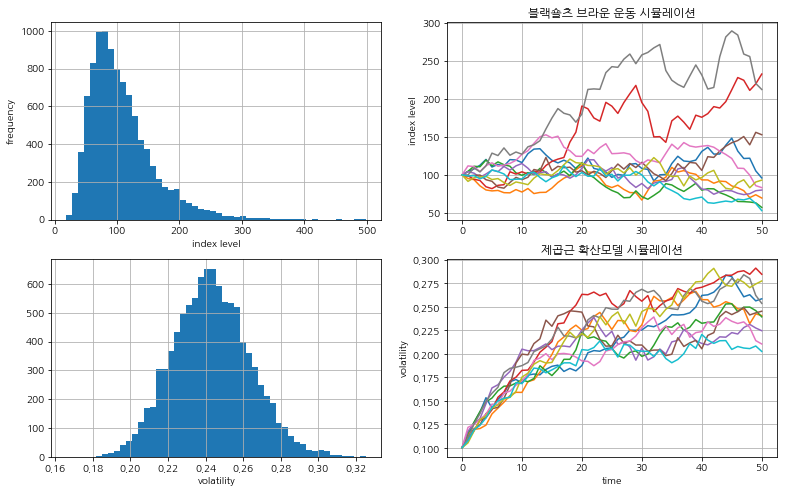

In [14]:
# 난수의 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 8))
ax1.hist(S[-1], bins=50)     # 블랙숄츠 '브라운 운동' 시뮬레이션 결과를 히스토그램으로 출력
ax1.set_xlabel('index level'); ax1.set_ylabel('frequency'); ax1.grid(True)
ax2.plot(S[:, :10], lw=1.5)
ax2.set_ylabel('index level'); ax2.grid(True); ax2.set_title('블랙숄츠 브라운 운동 시뮬레이션')

ax3.hist(v[-1], bins=50)     # '제곱근 확산 모형'의 시뮬레이션 결과를 히스토그램으로 출력
ax3.set_xlabel('volatility') ; ax3.grid(True)
ax4.plot(v[:, :10], lw=1.5)
ax4.set_xlabel('time'); ax4.set_ylabel('volatility'); ax4.grid(True); ax4.set_title('제곱근 확산모델 시뮬레이션')
# '블랙숄츠 브라운 모형'은 카이제곱 분포를, '제곱근 확산모형'은 정규분포를 갖는다
# 해석 : '제곱근 확산모델'의 변동성 과정은, 양의 표류 경향을 보이며 0.25로 확산 수렴된다

### <strong>05 점프 확산 (Jump-Diffusion) 
자산가격이나, <strong>변동성이 점프</strong>하는 현상이 종종 관찰된다

이를 반영하여 <strong>로그 정규분포에 점프요인을 더한</strong> BSM 모델로써 <strong>'점프확산'(jump diffusion) 모형</strong>을 발표하였다

$$ \mathrm dS_t = (r-r_j)S_t \mathrm dt + \sigma S_t \mathrm dZ_t + J_tS_t \mathrm dN_t $$
1. $S_t :$ 시간 t에서 주가
1. r : 고정 무위험 단기 이자율
1. $\sigma :$ S의 고정 변동성
1. $Z_t :$ 표준 브라운 운동
1. $J_t :$ 시간 t에서 점프, 분포값을 정의
1. $N_t :$ 점프 강도를 정의가능한 포아송 과정

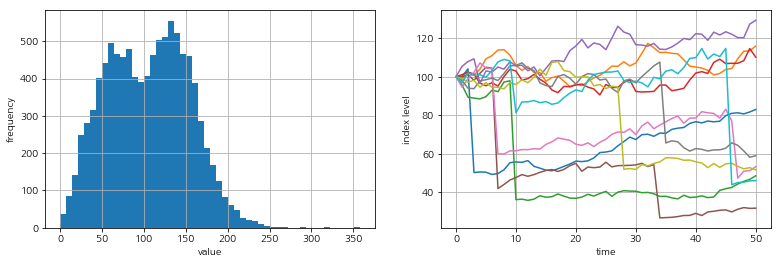

In [15]:
# 파라미터 설정
S0,      r,     T  = 100., 0.05, 1.0
sigma, lamb, delta = 0.2 , 0.75, 0.25
M,       I,     dt = 50,  10000, T/M
mu   =  -0.6    # 점프의 평균에 큰 음수를 가정 (정규분포보다 우편향)
rj   =  lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S    =  np.zeros((M + 1, I))
S[0] =  S0

sn1 = np.random.standard_normal((M + 1, I))
sn2 = np.random.standard_normal((M + 1, I))
poi = np.random.poisson(lamb * dt, (M + 1, I))

# 변동성이 점프를 반영한 '점프확산'(jump diffusion) 모형을 활성화
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                    + sigma * np.sqrt(dt) * sn1[t])
                    + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    S[t] = np.maximum(S[t], 0)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
ax1.hist(S[-1], bins=50)     # 점프 확산모형을 '히스토그램'으로 출력
ax1.set_xlabel('value'); ax1.set_ylabel('frequency'); ax1.grid(True)
ax2.plot(S[:, :10], lw=1.5)  # 10개의 시뮬레이션 결과를 출력
ax2.set_xlabel('time'); ax2.set_ylabel('index level'); ax2.grid(True)
# 해석 : 주가가 아래쪽으로 검프하는 현상을 관찰가능하다

<br>
## <strong>4 분산 감소 (Variance Reduction)
준-난수를 사용시 통계적 특성이 충분히 발현되기가 어려우므로, <strong>Seed를 특정</strong>하면 <strong>고정된 난수로 비교가 가능하다

In [16]:
# np.random.seed(1000) : 난수생성 기준을 고정 후 반복생성
print("%15s %15s" % ('Mean', 'Std. Deviation'), '\n', 31 * "-")
for i in range(1, 31, 2):
    np.random.seed(1000)
    sn = np.random.standard_normal(i ** 2 * 10000)
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))
# 반복 횟수가 클수록, 평균 0 수렴, 분산 1 수렴 (정규화)
# 한계 : 8,000,000번 이상을 반복해도 평균이 0이 안된다

           Mean  Std. Deviation 
 -------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [17]:
# 대조변수 (antithetic variates)
# 난수를 전체의 절반만 생성하고, 부호를 반대로 복/붙하여 생성한다
sn = np.random.standard_normal(int(10000/2)) # 전체의 절반만큼 생성
sn = np.concatenate((sn, -sn))               # 대조변수(antithetic variates)를 생성 
print(np.shape(sn))
print("%15s %15s" % ('Mean', 'Std. Deviation'), '\n', 31*"-")
for i in range(1, 31, 2):
    np.random.seed(1000)
    sn = np.random.standard_normal(i ** 2 * int(10000/2))
    sn = np.concatenate((sn, -sn))           # 대조변수(antithetic variates)를 생성
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))
# 결론 : 바로 1회부터 평균이 0으로 수렴된다
# 한계 : 2차 모멘트를 활용하는 '표준편차'에는 영향을 미치지 않는다

(10000,)
           Mean  Std. Deviation 
 -------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [18]:
# 모멘트 정합 (Moment Matching)
sn = np.random.standard_normal(10000)
print('sn.mean()     :', sn.mean())
print('sn.std()      :', sn.std())
sn_new = (sn - sn.mean()) / sn.std()
print('sn_new.mean() :', sn_new.mean())
print('sn_new.std()  :', sn_new.std())
# 개별 난수값에서 평균을 뺴고 표준편차로 나누면  cf) sn_new = (sn - sn.mean()) / sn.std()
# 1차, 2차 모멘트를 모두 만족하는 난수집합이 생성 가능하다

sn.mean()     : -0.00116599829516
sn.std()      : 0.991255920205
sn_new.mean() : -2.3803181648e-17
sn_new.std()  : 1.0


In [19]:
# 분산감소방법을 활용한 표준정규분포 난수생성기 사용자함수
def gen_sn(M, I, anti_paths=True, mo_match=True):            
    if anti_paths is True:                                   # anti_paths = True : 대조변수 사용 (boolean)
        sn = np.random.standard_normal((M + 1, int(I / 2)))  # M (integer) : 이산화 구간의 갯수 
        sn = np.concatenate((sn, -sn), axis=1)               # I (integer) : 시뮬레이션 횟수 
    else:
        sn = np.random.standard_normal((M + 1, I))         
    if mo_match is True:                                     # mo_match = True   : 모멘트 정합 사용 (boolean)
        sn = (sn - sn.mean()) / sn.std()
    return sn

gen_sn(M,I)

array([[ 0.83259781,  1.02328643,  0.15821618, ...,  1.84916422,
         0.41732035, -0.15682406],
       [ 0.17543294,  0.46816674, -0.06633836, ..., -0.5071587 ,
        -0.98350549,  0.12616592],
       [-1.96430571,  1.47446102,  0.24255949, ...,  0.02467741,
         1.25241378,  0.82180231],
       ..., 
       [ 0.76934296, -0.17359342, -0.14246721, ...,  0.21030476,
        -0.07327105,  0.9476135 ],
       [ 0.09193061, -0.82497292, -0.9372698 , ...,  0.91753719,
         0.38755116,  0.97356457],
       [-0.61663611,  0.08116784,  0.0177379 , ...,  0.05207249,
        -1.29867552, -0.95898492]])

<br>
## <strong>5 가치평가 1 (유러피안 옵션 평가방법 활용)
몬테카를로 시뮬레이션
### <strong>01 '기하 브라운 운동' 인수값을 활용한 유러피안 옵션
<strong>BSM모델로 몬테카를로 시뮬레이션</strong>을 시행

In [20]:
S0, r, sigma = 100., 0.05, 0.25
T,  I        = 1.0 , 50000

# '브라운 운동'인수값 행사가격을 인수로 받아서 계산 (MCS estimator)
def gbm_mcs_stat(K):                              # K:옵션의 행사가 (float)
    sn = gen_sn(1, I)                             # 분산감소를 활용한 난수생성기 활성화
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T  # 만기의 가격 '몬테카를로 시뮬레이션'
            + sigma * np.sqrt(T) * sn[1])
    hT = np.maximum(ST - K, 0)                    # 만기의 payoff를 계산
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)     
    return round(C0, 6)  # 유러피안 콜옵션 만기시 추정가격 (float)

K = 105.  # 옵션의 초기 행사가격
print('1년 만기 옵션가격 예측 :', gbm_mcs_stat(K))

1년 만기 옵션가격 예측 : 10.071006


### <strong>02 '동적 시뮬레이션' 방식을 활용한 유러피안 옵션
BSM모델로 몬테카를로 시뮬레이션을 시행

In [21]:
# 동적 시뮬레이션 방식을 활용한 '유러피안 풋옵션' 가치평가 함수
def gbm_mcs_dyna(K, option = 'call'):  # K:옵션 행사가격 (+ float),  option:옵션의 유형 ('call','put')
    dt   = T/M
    S    = np.zeros((M+1, I)) # 주가경로 시뮬레이션
    S[0] = S0
    sn   = gen_sn(M, I)       # 분산감소를 활용한 난수생성기
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    if option == 'call':      # 옵션 유형에 따른 payoff의 계산
        hT = np.maximum(S[-1]-K, 0)
    else:
        hT = np.maximum(K-S[-1], 0)
    C0   = np.exp(-r * T) * 1 / I * np.sum(hT) # MCS estimator
    return round(C0, 6)       # 유러피안 콜옵션 만기시 추정가격 (float)

M = 50
print('Call :',gbm_mcs_dyna(K=105., option='call'))  # 105. 행사시 Call 가격
print('Put  :',gbm_mcs_dyna(K=105., option='put'))

Call : 9.96736
Put  : 9.840902


### <strong>03 '정적 시뮬레이션' 방식을 활용한 유러피안 옵션
<strong>Analytical Black-Scholes-Merton (BSM) Formula</strong> : BSM모델로 몬테카를로 시뮬레이션을 시행
1. Returns <strong>value</strong> : 만기시 콜옵션 가격 (float)
1. Parameters  
  1. <strong>S0</strong> : 최초 가격 (float)
  1. <strong>K</strong>  : 행사가격 (float)
  1. <strong>T</strong>  : 만기기간 (float)
  1. <strong>r</strong>  : 무위험 확률 (float)
  1. <strong>sigma</strong> : 변동성 Beta 값 (float)


In [22]:
def bsm_call_value(S0, K, T, r, sigma):
    from math import log, sqrt, exp
    from scipy import stats
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    # stats.norm.cdf --> 정규분포를 누적분포로 변환
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

S0 = 100
print('초기값이 {} 인 옵션의 만기가격 : {}'.format(S0, bsm_call_value(S0, K, T, r, sigma)))

초기값이 100 인 옵션의 만기가격 : 10.00220211715488


### <strong>04 '동적/ 정적 시뮬레이션' 방식의 비교
Visualization

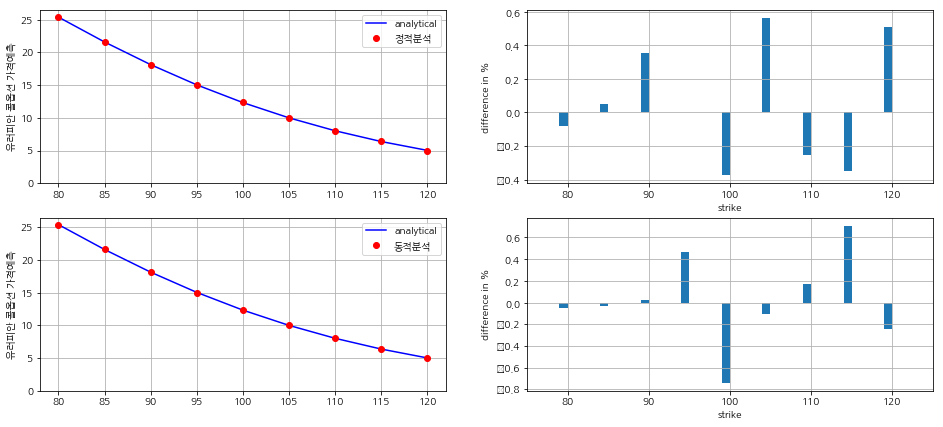

In [23]:
# 정적, 동적, 비교대상(브라운 운동모형) 데이터 생성
stat_res, dyna_res, anal_res = [], [], []
k_list = np.arange(80., 120.1, 5.)
np.random.seed(200000)

for K in k_list:
    stat_res.append(gbm_mcs_stat(K))                    # 브라운 운동 시뮬레이션 결과를 저장
    dyna_res.append(gbm_mcs_dyna(K))                    # 동적 시뮬레이션 결과를 저장
    anal_res.append(bsm_call_value(S0, K, T, r, sigma)) # 블랙숄즈머튼 해석공식 결과를 저장
stat_res, dyna_res, anal_res = np.array(stat_res), np.array(dyna_res), np.array(anal_res)

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,7))
ax1.plot(k_list, anal_res,  'b', label='analytical')  # 정적 분석의 특징 비교분석
ax1.plot(k_list, stat_res, 'ro', label='정적분석')
ax1.set_ylabel('유러피안 콜옵션 가격예측'); ax1.grid(True); ax1.legend(loc=0); ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike'); ax2.set_ylabel('difference in %'); ax2.set_xlim(left=75, right=125); ax2.grid(True)

ax3.plot(k_list, anal_res,  'b', label='analytical')  # 동적 분석의 특징 비교분석
ax3.plot(k_list, dyna_res, 'ro', label='동적분석')
ax3.set_ylabel('유러피안 콜옵션 가격예측'); ax3.grid(True); ax3.legend(loc=0); ax3.set_ylim(ymin=0)
ax4.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax4.set_xlabel('strike'); ax4.set_ylabel('difference in %'); ax4.set_xlim(left=75, right=125); ax4.grid(True)
# 정적/ 동적 모델의 분석결과, '+- 오차 1% 이내'로 존재한다
# 품질관리는 M (시간 간격의 수), I (시뮬레이션 반복횟수) 값은 변화하며 조절한다

<br>
## <strong>6 가치평가 2 - 아메리칸 옵션
유러피안 모델에 비해 <strong>'최적정치문제'</strong>를 추가적으로 풀어야 한다 (이산 시간 그리드를 사용하여 푼다)

In [24]:
def gbm_mcs_amer(K, option='call'):                 # K : 옵션 행사가격 (float)
    dt   = T/M
    df   = np.exp(-r * dt)
    S    = np.zeros((M + 1, I))                        # 주가 시뮬레이션
    S[0] = S0
    sn   = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    if option == 'call':  h = np.maximum(S - K, 0)  # Call 옵션의 경우
    else:                 h = np.maximum(K - S, 0)  # Put 옵션의 경우
    V = np.copy(h)                                  # LSM 알고리즘
    for t in range(M - 1, 0, -1):  
        reg  = np.polyfit(S[t], V[t + 1] * df, 7)
        C    = np.polyval(reg,  S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    C0 = df * 1 / I * np.sum(V[1])                 # MCS 시뮬레이션
    return round(C0, 6)

# 조기행사 프리미엄 : 두 옵션의 가격차이 
print('Call :', gbm_mcs_amer(110., option='call'))
print('Put  :', gbm_mcs_amer(110., option='Put'))

Call : 7.778933
Put  : 13.614023


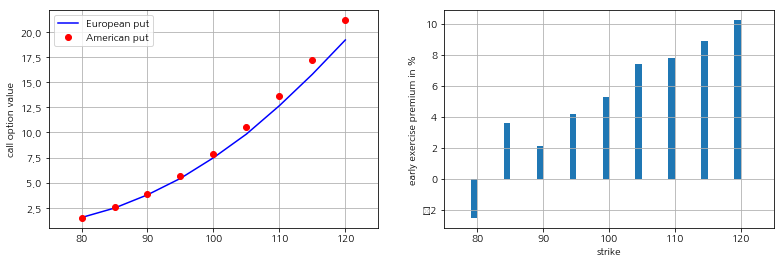

In [25]:
euro_res, amer_res = [], []
k_list = np.arange(80., 120.1, 5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))
euro_res, amer_res = np.array(euro_res),  np.array(amer_res)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(13, 4))
ax1.plot(k_list, euro_res,  'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value'); ax1.grid(True); ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike'); ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125); ax2.grid(True)
# 유러피안 모델과 비교 결론 : 미국 옵션의 '조기행사프리미엄'이 10% 정도 상승한다

<br>
## <strong>7 위험측도
<strong>Risk Management</strong>를 계산 및 추정하는 다양한 방법을 구현한다
### <strong>01 Value-at-Risk 1 (BSM 기반한 30일간의 미래 주가를 예측)
<strong>Value-at-Risk (VAR)</strong> : 특정 <strong>확률적 신뢰도</strong>, 특정 <strong>기간</strong>내 발생가능한 <strong>손실금액</strong>을 예측한다

한계) 직관적이여서 실무에 많이 사용하지만, <strong>Tail Risk를 파악 못하는 단점</strong>으로 비판을 받는다
- <strong>Tail Risk</strong> : 발생확률이 적은 일의 빈도가 늘어남으로써, <strong>정규분포보다 꼬리가 굵어</strong>지는 현상

(10000,)


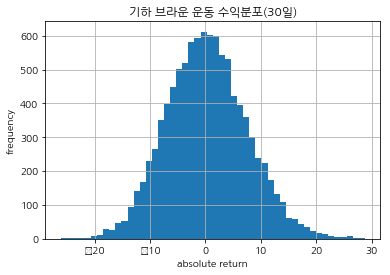

In [26]:
# 1. 블랙-숄즈 시뮬레이션
S0, r, sigma = 100, 0.05, 0.25
I,  T        = 10000, 30/365.                                   # 기하 브라운 운동모형의 수익분포 (30일)
ST    = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
           + sigma * np.sqrt(T) * np.random.standard_normal(I)) # 블랙-숄즈-머튼 모형 시뮬레이션
R_gbm = np.sort(ST - S0)                                        # 현재가치와 비교하여 '가장 큰 손실 ~ 큰 수익' 순서로 정렬
print(R_gbm.shape)

plt.hist(R_gbm, bins = 50)                                      # 30일 시뮬레이션 성과를 히스토그램으로 출력한다
plt.xlabel('absolute return'); plt.ylabel('frequency'); plt.title('기하 브라운 운동 수익분포(30일)'); plt.grid(True)

In [27]:
# 2. VaR을 예측 (블랙숄즈 결과(ndarray)를 활용)
# 신뢰구간 [list]를 생성 : {0.01 ~ 10.0 : 99% ~ 90%}
# cf) {0.1 : 100-0.01 = 99%,  10.: 100-10 = 90%}
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]  

import scipy.stats as scs
var = scs.scoreatpercentile(R_gbm, percs)   # 신뢰구간에 따른 VaR을 자동으로 계산 (시뮬레이션결과, 원하는 신뢰구간)
print("%22s %16s" % ('신뢰도(Confidence Level)', 'Value-at-Risk'), '\n', 40 * "-")
for pair in zip(percs, var):                # zip : 인덱스별 (tuple)로 묶는다 
    print("%22.2f %16.3f" % (100 - pair[0], -pair[1]))

 신뢰도(Confidence Level)    Value-at-Risk 
 ----------------------------------------
                 99.99           26.072
                 99.90           20.175
                 99.00           15.753
                 97.50           13.265
                 95.00           11.298
                 90.00            8.942


### <strong>02 Value-at-Risk 2
<strong>머튼의 점프 확산모형(Jump-Diffusion)</strong> 을 동적으로 시뮬레이션 한다

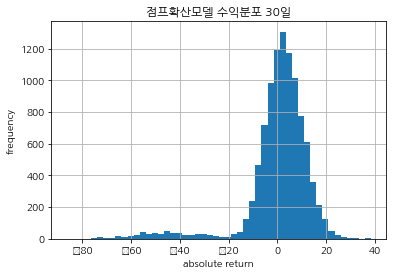

In [28]:
# 점프확산모형의 30일 수익분포
dt   = 30./365/M
rj   = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S    = np.zeros((M + 1, I))
S[0] = S0
sn1  = np.random.standard_normal((M + 1, I))
sn2  = np.random.standard_normal((M + 1, I))
poi  = np.random.poisson(lamb * dt, (M + 1, I))

for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                    + sigma * np.sqrt(dt) * sn1[t])
                    + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    S[t] = np.maximum(S[t], 0)

R_jd = np.sort(S[-1] - S0)  # Range Jump Model
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return'); plt.ylabel('frequency'); plt.title('점프확산모델 수익분포 30일'); plt.grid(True)
# 결론 : 점프요인이 '-'여서, 시뮬레이션 손익은 정규분포상 좌측으로 치우친 결과 갖는다 (Tail Risk에 취약)

 신뢰도(Confidence Level)    Value-at-Risk 
 ----------------------------------------
                 99.99           75.029
                 99.90           71.833
                 99.00           55.901
                 97.50           45.697
                 95.00           25.993
                 90.00            8.773


(-90.277619106623035, 0.0)

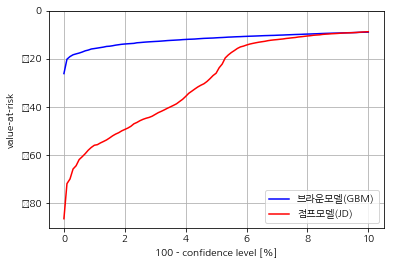

In [29]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print("%22s %16s" % ('신뢰도(Confidence Level)', 'Value-at-Risk'), '\n', 40 * "-")
for pair in zip(percs, var):
    print("%22.2f %16.3f" % (100 - pair[0], -pair[1]))

# GBM (브라운모델)과 JD (점프모델)의 비교
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

plt.plot(percs, gbm_var, 'b', lw=1.5, label='브라운모델(GBM)')
plt.plot(percs, jd_var,  'r', lw=1.5, label='점프모델(JD)')
plt.xlabel('100 - confidence level [%]'); plt.ylabel('value-at-risk')
plt.legend(loc=4); plt.grid(True);plt.ylim(ymax=0.0)
# 99.99% 의 VAR 값은 1번 모델에 비해 3배이상 크다 (이후 의 신뢰구간의 값은 1번모델과 동일하게 수렴한다)
# 99.99%의 값이 크므로, Tail Risk에는 취약한 단점을 갖는다.

### <strong>02 CVA (Credit Value Adjustment 1)
<strong>VaR</strong>파생모델로, <strong>파산위험을 고려</strong>한 위험측도이다
- <strong>부도확률</strong>(Probability default)과 <strong>손실수준</strong>(Loss level) 가정을 필요로 한다

   위험중립측도 내 주가예측 : 99.9818252168
         VaR 위험도 측정 :  0.515201113416
   본자산-VaR(CvA비교군) :   99.4847988866
             CvA 위험도 :   99.4666241034
------------------------------------------- 
시뮬레이션 중 부도 발생수 : 1031 
부도비율 : 1.031%


(0.0, 175)

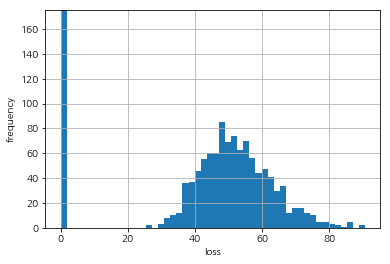

In [30]:
S0,    r    = 100.   , 0.05
sigma, T, I = 0.2, 1., 100000                  # sigma : 변동률
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T   # BSM 시뮬레이션
             + sigma * np.sqrt(T) * np.random.standard_normal(I))

L, p = 0.5, 0.01                              # L:손실수준, p:상대방의 1년 부도확률
D    = np.random.poisson(p * T, I)            # 부도 시나리오생성 (포아송 분포)
D    = np.where(D > 1, 1, D)                  # 단 시나리오상 부도는 1번만 일어난다
print('%18s %13s'%('위험중립측도 내 주가예측 :',np.exp(-r * T) * 1 / I * np.sum(ST)))  # 부도가 안일어나는 경우 주가예측

CVaR    = np.exp(-r*T)*1 / I*np.sum(L*D*ST); print('%21s %15s'%('VaR 위험도 측정 :', CVaR))         # VAR (신용위험을 측정)
S0_adj  = S0-CVaR                           ; print('%20s %15s'%('본자산-VaR(CvA비교군) :', S0_adj)) # CVA와의 비교군 (본자산-신용 VAR)
S0_CVA  = np.exp(-r*T)*1 / I*np.sum((1-L*D)*ST); print('%22s %15s'%('CvA 위험도 :', S0_CVA))      # CvA 측정
default = np.count_nonzero(L * D * ST)                                                           # BSM 모형의 부도위험 
print('-'*43,'\n시뮬레이션 중 부도 발생수 : {} \n부도비율 : {}%'.format(default, round(default/I*100, 7)))
# 전체 100,000 반복중 , 964번째 부도가 발생 (약 1%로  p = 0.01 설정과 유효한 결론 도출을 확인가능)

plt.hist(L * D * ST, bins=50)  # 위험중립 부도로 인한 손실 (대부분은 부도로 인한 손실이 없다)
plt.xlabel('loss'); plt.ylabel('frequency'); plt.grid(True); plt.ylim(ymax=175)  

### <strong>03 Credit Value Adjustment 3
유러피안 콜옵션에 위험모델 적용

In [31]:
K = 100.
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * 1 / I * np.sum(hT)            ; print('유러피안 콜옵션 행사가격 :',C0)  # BSM 유러피안 시뮬레이션
CVaR   = np.exp(-r * T) * 1 / I * np.sum(L * D * hT); print('손실수준을 고려한 VaR:', CVaR) # 손실수준을 고려한 신용 VaR
C0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * hT); print('위험조정 옵션가격 :',C0_CVA) # 위험조정 옵션가격

print('*'*43,'\n','%13s'%('손실횟수:'), np.count_nonzero(L * D * hT))  
print('%14s'%('부도횟수:'), np.count_nonzero(D))
print('%14s'%('payoff가 없는구간:'), I - np.count_nonzero(hT))
# 결론
# 자산에 비해 옵션은 '손실횟수'값이 절반밖에 안된다
# 이는 옵션의 기간만료로 인한 소멸이 반영된 결과이다

유러피안 콜옵션 행사가격 : 10.4273361097
손실수준을 고려한 VaR: 0.0538225784522
위험조정 옵션가격 : 10.3735135312
******************************************* 
         손실횟수: 582
         부도횟수: 1031
 payoff가 없는구간: 43995


(0.0, 350)

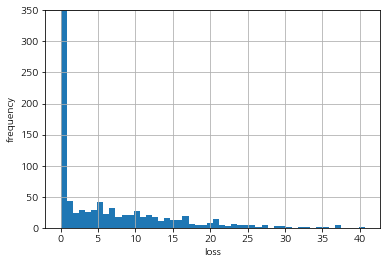

In [32]:
plt.hist(L * D * hT, bins=50)
plt.xlabel('loss'); plt.ylabel('frequency')
plt.grid(True); plt.ylim(ymax=350)
# 결과
# Numpy의 함수를 사용하면
# 몬테카를로 시뮬레이션 공식을 대다수 적용이 가능하다